In [35]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import sklearn as sk
import matplotlib.pyplot as plt

file_path = './results.xlsx'
print(os.path.exists(file_path))

True


In [36]:
df = pd.read_excel(file_path,sheetname='tmp_read')
df.head(10)

,target,pdb_id,obj1_glide_score,obj1_rf_score,obj1_ngf_3d,obj2_glide_score,obj2_rf_score,obj2_ngf_3d,obj3_glide_score,obj3_rf_score,obj3_ngf_3d,binding_site,ref_score,ref_rmsd,ref_ligand,Unnamed: 15
PI3K/Akt/mTOR,PI3K,3sd5,-6.859,6.718976,7.167570,-7.329,5.429806,6.942088,-7.695,7.926694,10.885090,NaN,-9.053,0.8296,BKM120,dual inhibitor
NaN,akt1,6ccy,-4.743,4.197031,9.061049,-6.211,6.158155,8.154026,-5.791,7.066079,15.460066,NaN,-9.805,1.642,EX4,NaN
NaN,pi3k/mTOR,5oq4,-7.074,7.059662,9.121409,-7.397,5.672508,7.261269,-7.000,7.000000,7.000000,NaN,-9.057,0.896,PQR309,NaN
Protein Tyrosine Kinase\n,egfr_1,4wkq,-7.250,7.903565,8.872153,-7.425,5.710562,10.395201,-8.651,6.521460,14.294282,NaN,-8.209,5.38,gefitinib,approved
NaN,egfr_2,4zau,-6.313,7.119515,9.994362,-6.426,5.385734,9.965951,-7.420,7.570977,15.014664,NaN,-8.235,1.205,azd9291,NaN
NaN,cmet,4r1v,-7.130,4.961797,5.433263,-6.626,5.581464,6.542807,-7.000,7.439058,12.347674,NaN,-12.644,1.367,pyridazinones (not drug),NaN
NaN,VEGFR2,2p2i,-9.160,7.166744,6.505250,-6.019,4.112641,6.870293,-10.802,8.319537,12.901293,NaN,-11.732,0.406,L-PEPTIDE LINKING,NaN
NaN,IGF-1R,2oj9,-6.433,6.861608,10.499047,-7.245,5.846906,7.511003,-8.536,8.261688,15.719524,NaN,-7.783,4.3825,BMI,NaN
NaN,FLT3,4xuf,-9.135,6.425102,7.978411,-7.253,6.057119,7.388872,-8.638,8.419054,10.448112,NaN,-12.083,0.8483,qulzartinib,NaN
NaN,FGFR1,3c4f,-9.040,5.963256,8.255105,-6.382,4.595432,7.718649,-7.195,7.294035,12.709260,NaN,-11.284,0.1838,3-(3-methoxybenzyl)-7-azaindole,NaN


In [51]:
target = df['target']
gscore = df['obj1_glide_score']
rf = df['obj1_rf_score']
ngf = df['obj1_ngf_3d']

gscore2 = df['obj2_glide_score']
rf2 = df['obj2_rf_score']
ngf2 = df['obj2_ngf_3d']

gscore3 = df['obj3_glide_score']
rf3 = df['obj3_rf_score']
ngf3 = df['obj3_ngf_3d']

print(np.corrcoef(gscore2, rf2), '\n', np.corrcoef(gscore2, ngf2), '\n', np.corrcoef(rf2, ngf2))
print(stats.pearsonr(gscore2, rf2), '\n', stats.pearsonr(gscore2, ngf2), '\n', stats.pearsonr(rf2, ngf2))

[[ 1.         -0.47462733]
 [-0.47462733  1.        ]] 
 [[ 1.        -0.0525381]
 [-0.0525381  1.       ]] 
 [[ 1.         -0.27331803]
 [-0.27331803  1.        ]]
(-0.47462732556058079, 0.0069795307428227047) 
 (-0.052538098968168613, 0.77894612278186459) 
 (-0.27331803151571349, 0.13682233462824747)


<class 'list'>


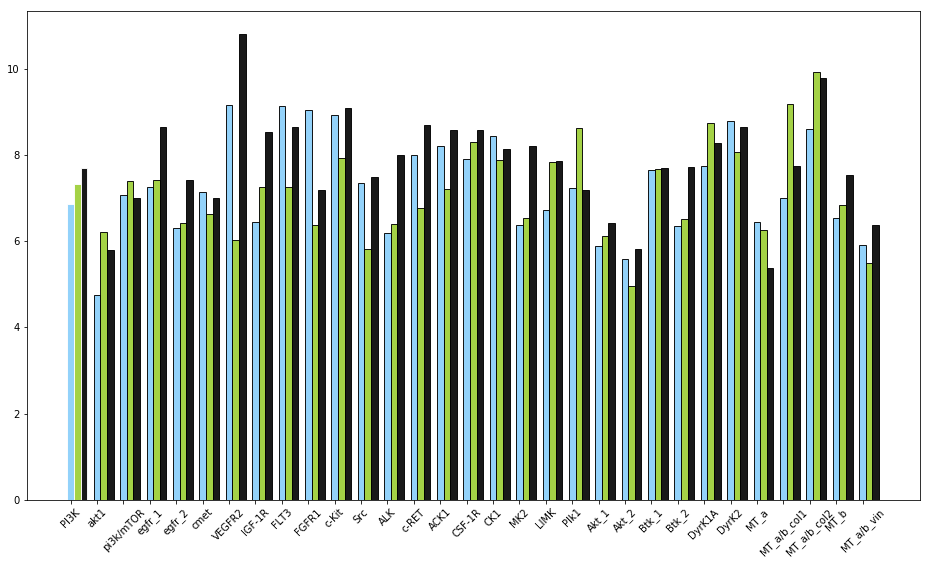

In [52]:
plt.figure(figsize=(16, 9))
n = 31
X = np.arange(n)+1

plt.bar(X, -gscore, alpha=0.9, width = 0.25, facecolor = 'lightskyblue', edgecolor = 'white', label='-gsocre', lw=1)
plt.bar(X+0.25, -gscore2, alpha=0.9, width = 0.25, facecolor = 'yellowgreen', edgecolor = 'white', label='second', lw=1)
plt.bar(X+0.5, -gscore3, alpha=0.9, width = 0.25, facecolor = 'black', edgecolor = 'white', label='second', lw=1)
# plt.legend(['gscore', 'rf_score', 'ngf'],loc="upper left", fontsize=20)
lst = list(target)
print(type(lst))
# print(lst)
plt.xticks(X, lst,rotation=45)
plt.show()

<class 'list'>


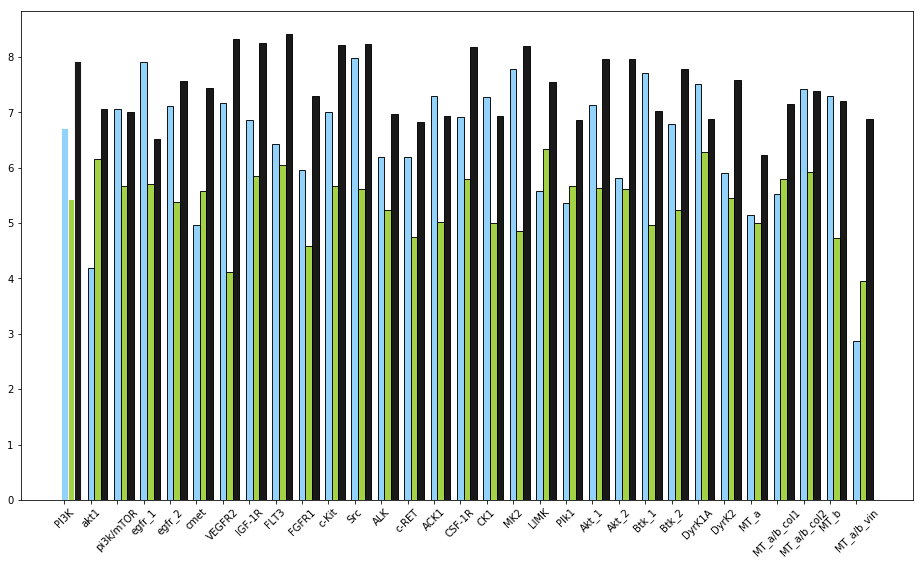

In [53]:
plt.figure(figsize=(16, 9))
n = 31
X = np.arange(n)+1

plt.bar(X, rf, alpha=0.9, width = 0.25, facecolor = 'lightskyblue', edgecolor = 'white', label='-gsocre', lw=1)
plt.bar(X+0.25, rf2, alpha=0.9, width = 0.25, facecolor = 'yellowgreen', edgecolor = 'white', label='second', lw=1)
plt.bar(X+0.5, rf3, alpha=0.9, width = 0.25, facecolor = 'black', edgecolor = 'white', label='second', lw=1)
# plt.legend(['gscore', 'rf_score', 'ngf'],loc="upper left", fontsize=20)
lst = list(target)
print(type(lst))
# print(lst)
plt.xticks(X, lst,rotation=45)
plt.show()

<class 'list'>


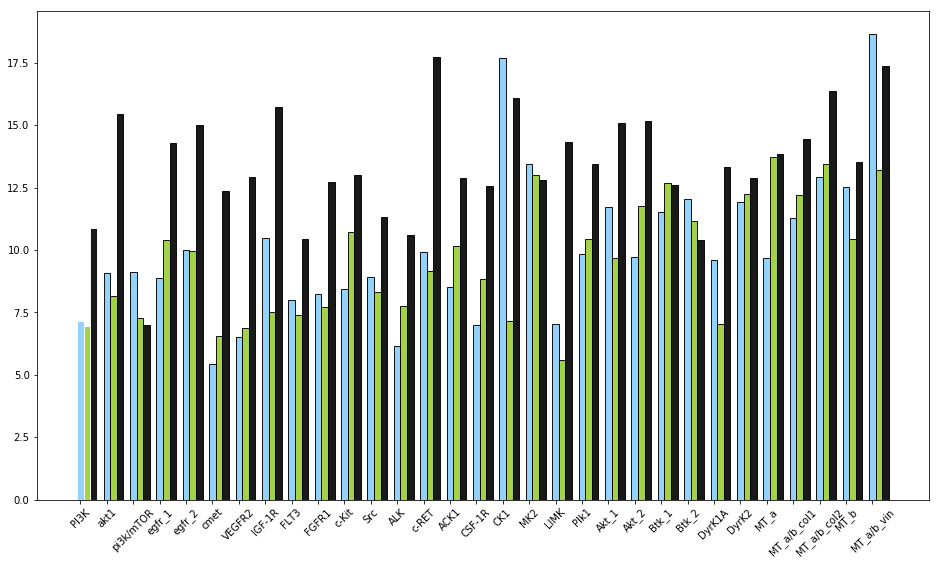

In [54]:
plt.figure(figsize=(16, 9))
n = 31
X = np.arange(n)+1

plt.bar(X, ngf, alpha=0.9, width = 0.25, facecolor = 'lightskyblue', edgecolor = 'white', label='-gsocre', lw=1)
plt.bar(X+0.25, ngf2, alpha=0.9, width = 0.25, facecolor = 'yellowgreen', edgecolor = 'white', label='second', lw=1)
plt.bar(X+0.5, ngf3, alpha=0.9, width = 0.25, facecolor = 'black', edgecolor = 'white', label='second', lw=1)
# plt.legend(['gscore', 'rf_score', 'ngf'],loc="upper left", fontsize=20)
lst = list(target)
print(type(lst))
# print(lst)
plt.xticks(X, lst,rotation=45)
plt.show()

[[ 1.         -0.47462733]
 [-0.47462733  1.        ]] 
 [[ 1.        -0.0525381]
 [-0.0525381  1.       ]] 
 [[ 1.         -0.27331803]
 [-0.27331803  1.        ]]
(-0.47462732556058079, 0.0069795307428227047) 
 (-0.052538098968168613, 0.77894612278186459) 
 (-0.27331803151571349, 0.13682233462824747)
<class 'list'>


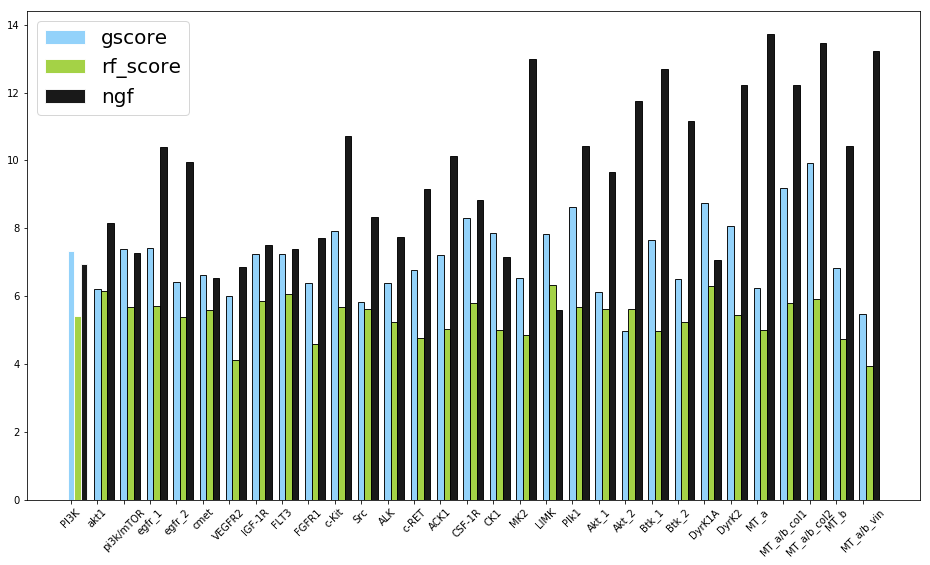

In [55]:
target = df['target']
gscore2 = df['obj2_glide_score']
rf2 = df['obj2_rf_score']
ngf2 = df['obj2_ngf_3d']

print(np.corrcoef(gscore2, rf2), '\n', np.corrcoef(gscore2, ngf2), '\n', np.corrcoef(rf2, ngf2))
print(stats.pearsonr(gscore2, rf2), '\n', stats.pearsonr(gscore2, ngf2), '\n', stats.pearsonr(rf2, ngf2))

plt.figure(figsize=(16, 9))
n = 31
X = np.arange(n)+1

plt.bar(X, -gscore2, alpha=0.9, width = 0.25, facecolor = 'lightskyblue', edgecolor = 'white', label='one', lw=1)
plt.bar(X+0.25, rf2, alpha=0.9, width = 0.25, facecolor = 'yellowgreen', edgecolor = 'white', label='second', lw=1)
plt.bar(X+0.5, ngf2, alpha=0.9, width = 0.25, facecolor = 'black', edgecolor = 'white', label='second', lw=1)
plt.legend(['gscore', 'rf_score', 'ngf'],loc="upper left", fontsize=20)
lst = list(target)
print(type(lst))
# print(lst)
plt.xticks(X, lst,rotation=45)
plt.show()

[[ 1.         -0.33615764]
 [-0.33615764  1.        ]] 
 [[ 1.          0.04508194]
 [ 0.04508194  1.        ]] 
 [[ 1.         -0.21265673]
 [-0.21265673  1.        ]]
(-0.33615764081850047, 0.064464467930077055) 
 (0.045081942542051834, 0.80970004902646853) 
 (-0.21265673020373521, 0.2507362924540037)
<class 'list'>


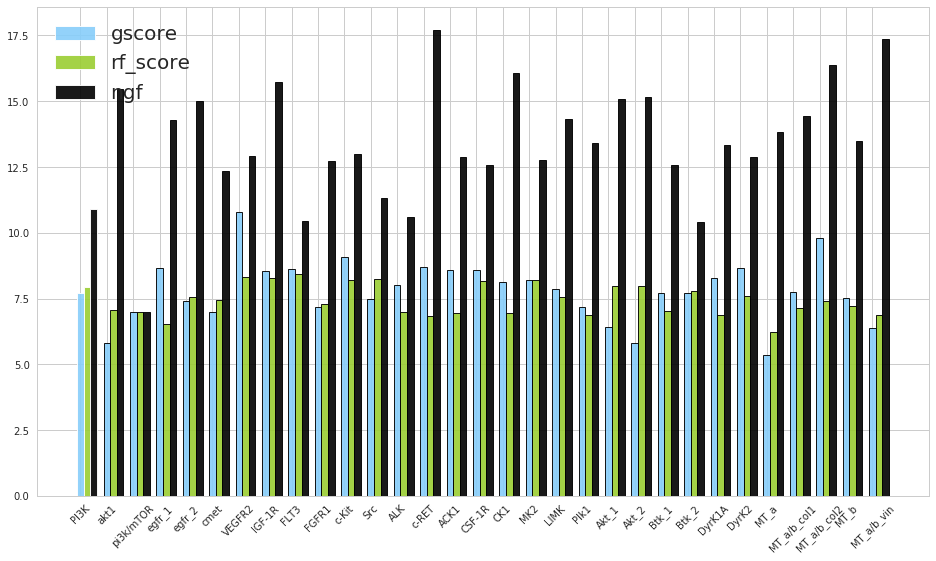

In [355]:
gscore3 = df['obj3_glide_score']
rf3 = df['obj3_rf_score']
ngf3 = df['obj3_ngf_3d']

print(np.corrcoef(gscore3, rf3), '\n', np.corrcoef(gscore3, ngf3), '\n', np.corrcoef(rf3, ngf3))
print(stats.pearsonr(gscore3, rf3), '\n', stats.pearsonr(gscore3, ngf3), '\n', stats.pearsonr(rf3, ngf3))

plt.figure(figsize=(16, 9))
n = 31
X = np.arange(n)+1

plt.bar(X, -gscore3, alpha=0.9, width = 0.25, facecolor = 'lightskyblue', edgecolor = 'white', label='one', lw=1)
plt.bar(X+0.25, rf3, alpha=0.9, width = 0.25, facecolor = 'yellowgreen', edgecolor = 'white', label='second', lw=1)
plt.bar(X+0.5, ngf3, alpha=0.9, width = 0.25, facecolor = 'black', edgecolor = 'white', label='second', lw=1)
plt.legend(['gscore', 'rf_score', 'ngf'],loc="upper left", fontsize=20)
lst = list(target)
print(type(lst))
# print(lst)
plt.xticks(X, lst,rotation=45)
plt.show()

In [326]:
plt.xticks?

In [223]:
from sklearn.preprocessing import Normalizer, MinMaxScaler

g_new = Normalizer(norm='l2').fit_transform(-gscore.values.reshape(1, -1))
rf_new = Normalizer(norm='l2').fit_transform(rf.values.reshape(1, -1))
ngf_new = Normalizer(norm='l2').fit_transform(ngf.values.reshape(1, -1))

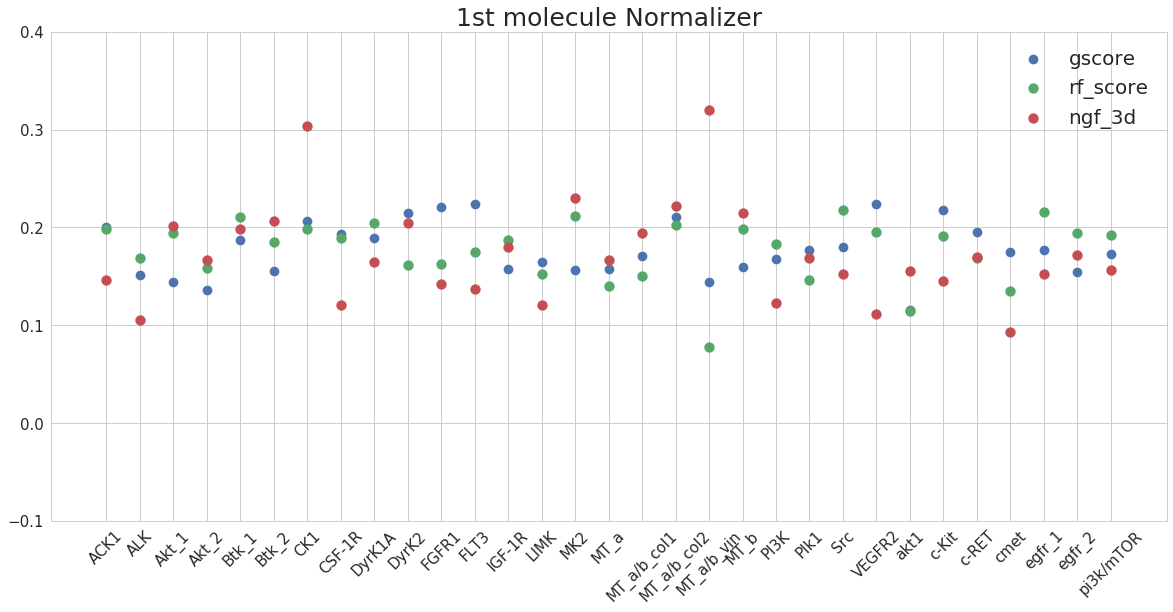

In [359]:
plt.figure(figsize=(20, 9))
plt.scatter(target, g_new, s=100, label='gscore', edgecolors='white')
plt.scatter(target, rf_new, s=100, label='rf_score')
plt.scatter(target, ngf_new, s=100, label='ngf_3d')
import pylab as pl
pl.xticks(rotation=45)
plt.legend(fontsize=20)
plt.ylim(-0.1, 0.4)
plt.title('1st molecule Normalizer', {'fontsize': 25})
plt.tick_params(labelsize=15)
plt.show()

In [225]:
g_new1 = MinMaxScaler().fit_transform(-gscore.values.reshape(-1, 1))
rf_new1 = MinMaxScaler().fit_transform(rf.values.reshape(-1, 1))
ngf_new1 = MinMaxScaler().fit_transform(ngf.values.reshape(-1, 1))

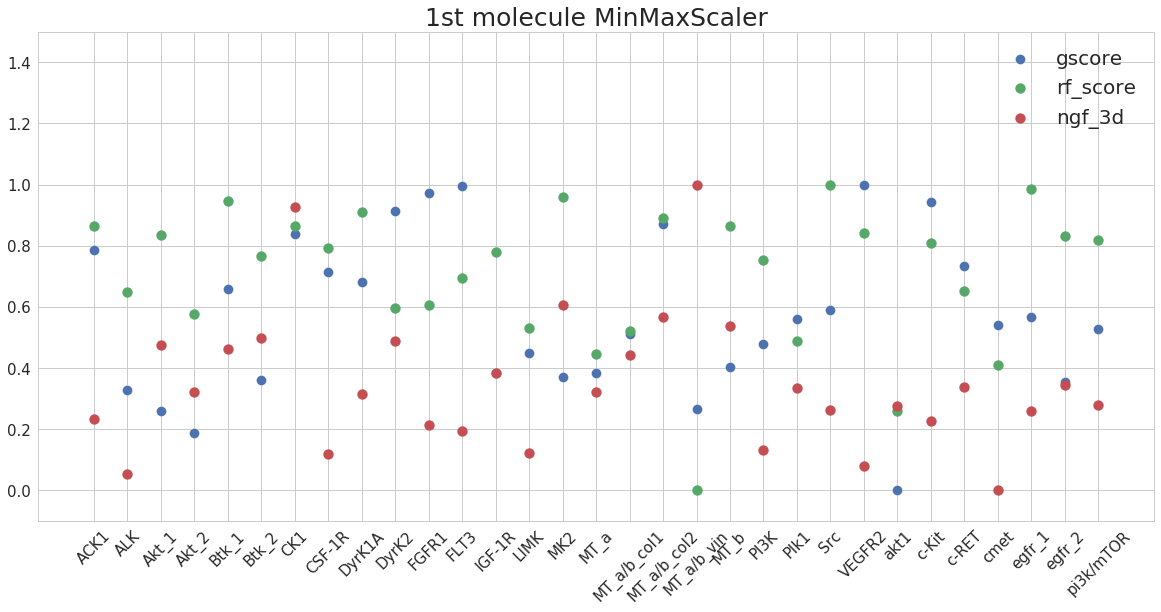

In [360]:
plt.figure(figsize=(20, 9))
plt.ylim(-0.1, 1.3)
plt.scatter(target.values, g_new1.ravel(), s=100, label='gscore',edgecolors='white')
plt.scatter(target, rf_new1.ravel(), s=100, label='rf_score')
plt.scatter(target, ngf_new1.ravel(), s=100, label='ngf_3d')
import pylab as pl
pl.xticks(rotation=45)
plt.legend(fontsize=20)
plt.title('1st molecule MinMaxScaler', {'fontsize': 25})
plt.ylim(-0.1, 1.5)
plt.tick_params(labelsize=15)
plt.show()

In [215]:
-gscore

PI3K/Akt/mTOR                6.859
NaN                          4.743
NaN                          7.074
Protein Tyrosine Kinase\n    7.250
NaN                          6.313
NaN                          7.130
NaN                          9.160
NaN                          6.433
NaN                          9.135
NaN                          9.040
NaN                          8.912
NaN                          7.342
NaN                          6.188
NaN                          7.991
NaN                          8.211
NaN                          7.900
NaN                          8.444
NaN                          6.377
NaN                          6.731
NaN                          7.224
NaN                          5.895
NaN                          5.574
NaN                          7.645
NaN                          6.343
NaN                          7.750
NaN                          8.783
macrotubule                  6.438
NaN                          7.000
NaN                 

In [216]:

Normalizer().fit_transform(np.array([0,1, 2, 1, 2,1, 0, 100]).reshape(1,-1))

array([[ 0.        ,  0.0099945 ,  0.01998901,  0.0099945 ,  0.01998901,
         0.0099945 ,  0.        ,  0.99945045]])

In [270]:
target = df['target']
gscore2 = df['obj2_glide_score']
rf2 = df['obj2_rf_score']
ngf2 = df['obj2_ngf_3d']

print(np.corrcoef(gscore2, rf2), '\n', np.corrcoef(gscore2, ngf2), '\n', np.corrcoef(rf2, ngf2))
print(stats.pearsonr(gscore2, rf2), '\n', stats.pearsonr(gscore2, ngf2), '\n', stats.pearsonr(rf2, ngf2))

[[ 1.         -0.47462733]
 [-0.47462733  1.        ]] 
 [[ 1.        -0.0525381]
 [-0.0525381  1.       ]] 
 [[ 1.         -0.27331803]
 [-0.27331803  1.        ]]
(-0.47462732556058079, 0.0069795307428227047) 
 (-0.052538098968168613, 0.77894612278186459) 
 (-0.27331803151571349, 0.13682233462824747)


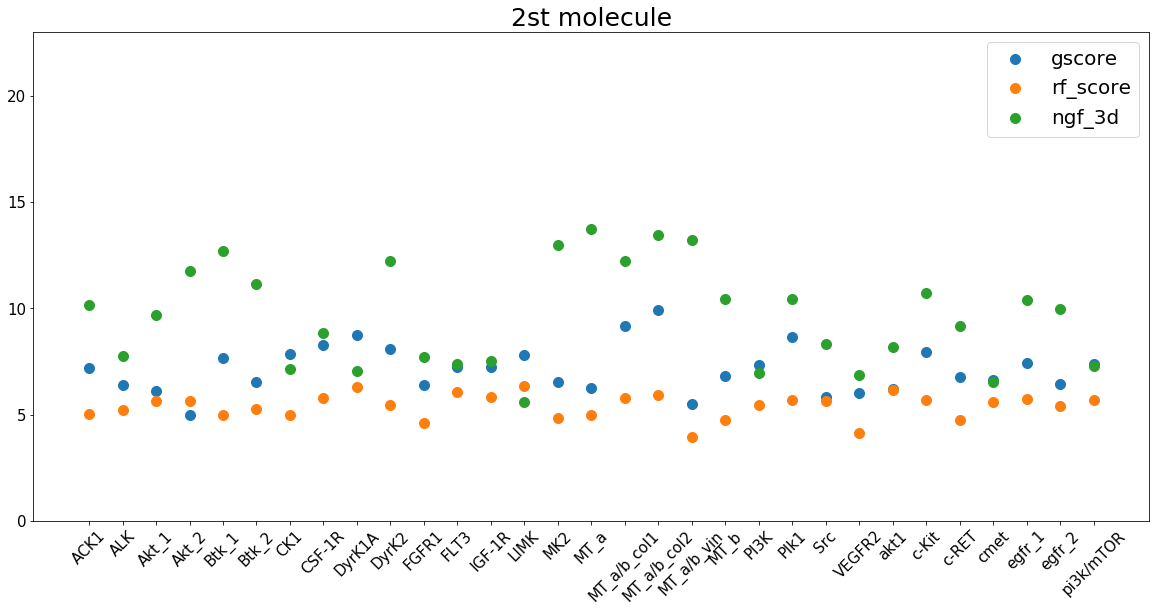

In [271]:
plt.figure(figsize=(20, 9))
plt.scatter(target.values, -gscore2, s=100, label='gscore')
plt.scatter(target, rf2, s=100, label='rf_score')
plt.scatter(target, ngf2, s=100, label='ngf_3d')
import pylab as pl
pl.xticks(rotation=45)
plt.legend(fontsize=20)
plt.ylim(0, 23)
plt.title('2st molecule', {'fontsize': 25})
plt.tick_params(labelsize=15)
plt.show()

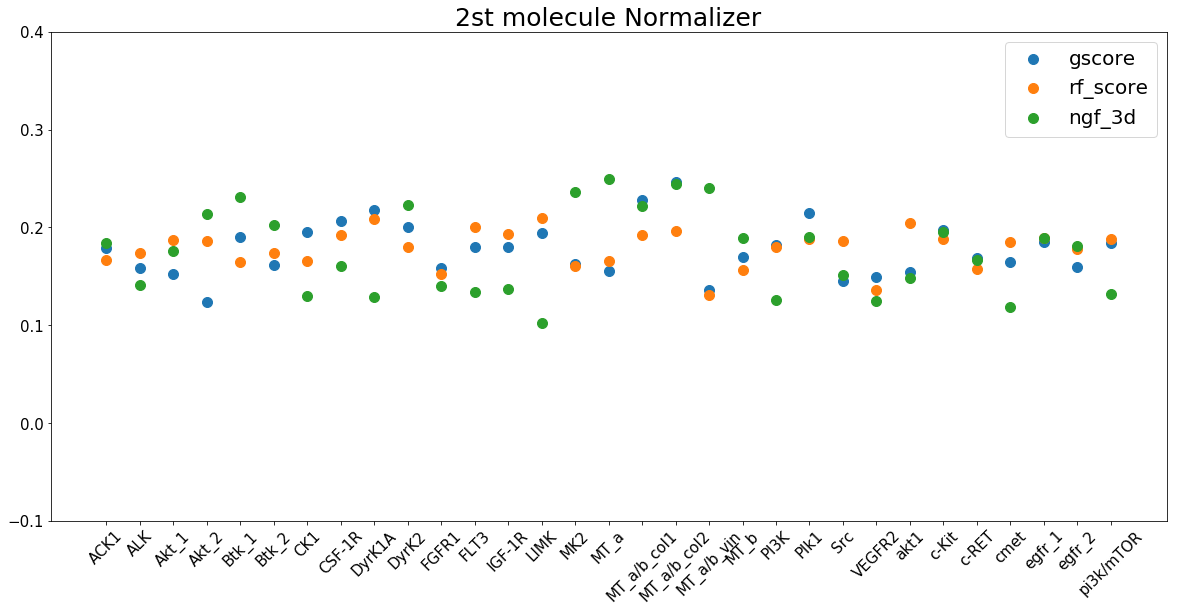

In [272]:
g_new2 = Normalizer(norm='l2').fit_transform(-gscore2.values.reshape(1, -1))
rf_new2 = Normalizer(norm='l2').fit_transform(rf2.values.reshape(1, -1))
ngf_new2 = Normalizer(norm='l2').fit_transform(ngf2.values.reshape(1, -1))

plt.figure(figsize=(20, 9))
plt.scatter(target, g_new2, s=100, label='gscore')
plt.scatter(target, rf_new2, s=100, label='rf_score')
plt.scatter(target, ngf_new2, s=100, label='ngf_3d')
import pylab as pl
pl.xticks(rotation=45)
plt.legend(fontsize=20)
plt.title('2st molecule Normalizer', {'fontsize': 25})
plt.ylim(-0.1, 0.4)
plt.tick_params(labelsize=15)
plt.show()

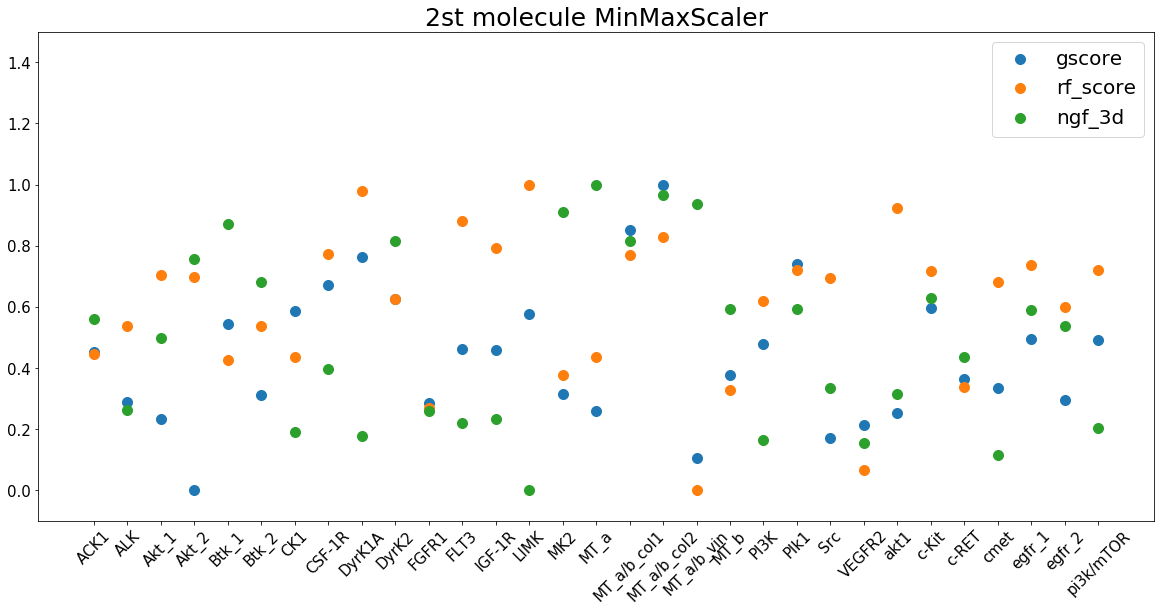

In [273]:
g_neww = MinMaxScaler().fit_transform(-gscore2.values.reshape(-1, 1))
rf_neww = MinMaxScaler().fit_transform(rf2.values.reshape(-1, 1))
ngf_neww = MinMaxScaler().fit_transform(ngf2.values.reshape(-1, 1))

plt.figure(figsize=(20, 9))
plt.ylim(-0.1, 1.3)
plt.scatter(target.values, g_neww.ravel(), s=100, label='gscore')
plt.scatter(target, rf_neww.ravel(), s=100, label='rf_score')
plt.scatter(target, ngf_neww.ravel(), s=100, label='ngf_3d')
import pylab as pl
pl.xticks(rotation=45)
plt.legend(fontsize=20)
plt.title('2st molecule MinMaxScaler', {'fontsize': 25})
plt.ylim(-0.1, 1.5)
plt.tick_params(labelsize=15)
plt.show()

In [274]:
gscore3 = df['obj3_glide_score']
rf3 = df['obj3_rf_score']
ngf3 = df['obj3_ngf_3d']

print(np.corrcoef(gscore3, rf3), '\n', np.corrcoef(gscore3, ngf3), '\n', np.corrcoef(rf3, ngf3))
print(stats.pearsonr(gscore3, rf3), '\n', stats.pearsonr(gscore3, ngf3), '\n', stats.pearsonr(rf3, ngf3))

[[ 1.         -0.33615764]
 [-0.33615764  1.        ]] 
 [[ 1.          0.04508194]
 [ 0.04508194  1.        ]] 
 [[ 1.         -0.21265673]
 [-0.21265673  1.        ]]
(-0.33615764081850047, 0.064464467930077055) 
 (0.045081942542051834, 0.80970004902646853) 
 (-0.21265673020373521, 0.2507362924540037)


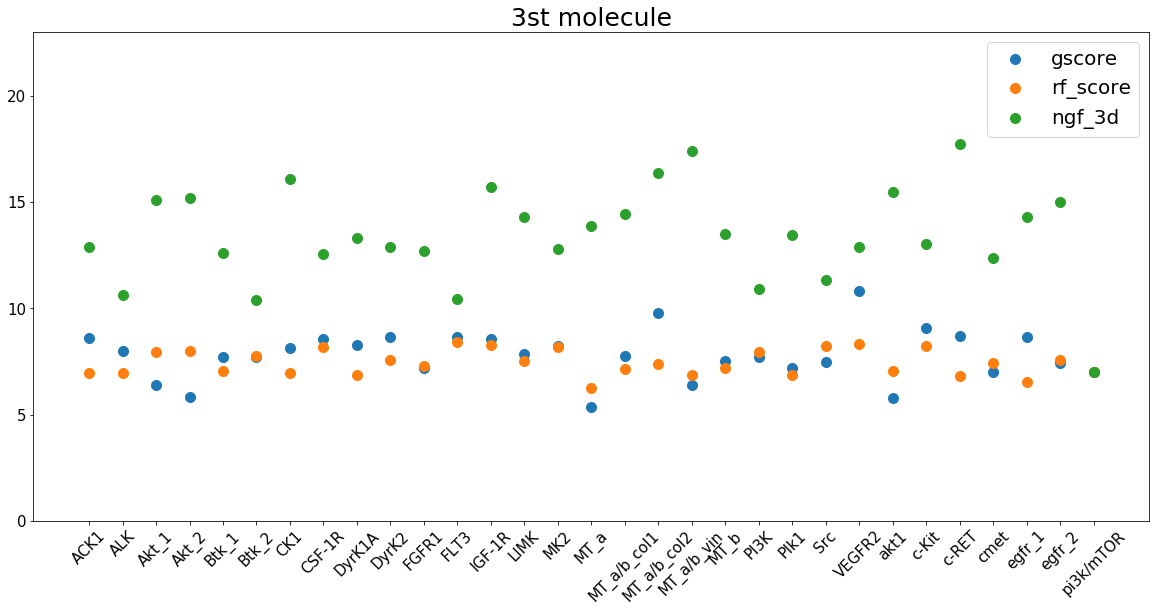

In [275]:
plt.figure(figsize=(20, 9))
plt.scatter(target.values, -gscore3, s=100, label='gscore')
plt.scatter(target, rf3, s=100, label='rf_score')
plt.scatter(target, ngf3, s=100, label='ngf_3d')
import pylab as pl
pl.xticks(rotation=45)
plt.legend(fontsize=20)
plt.ylim(0, 23)
plt.title('3st molecule', {'fontsize': 25})
plt.tick_params(labelsize=15)
plt.show()

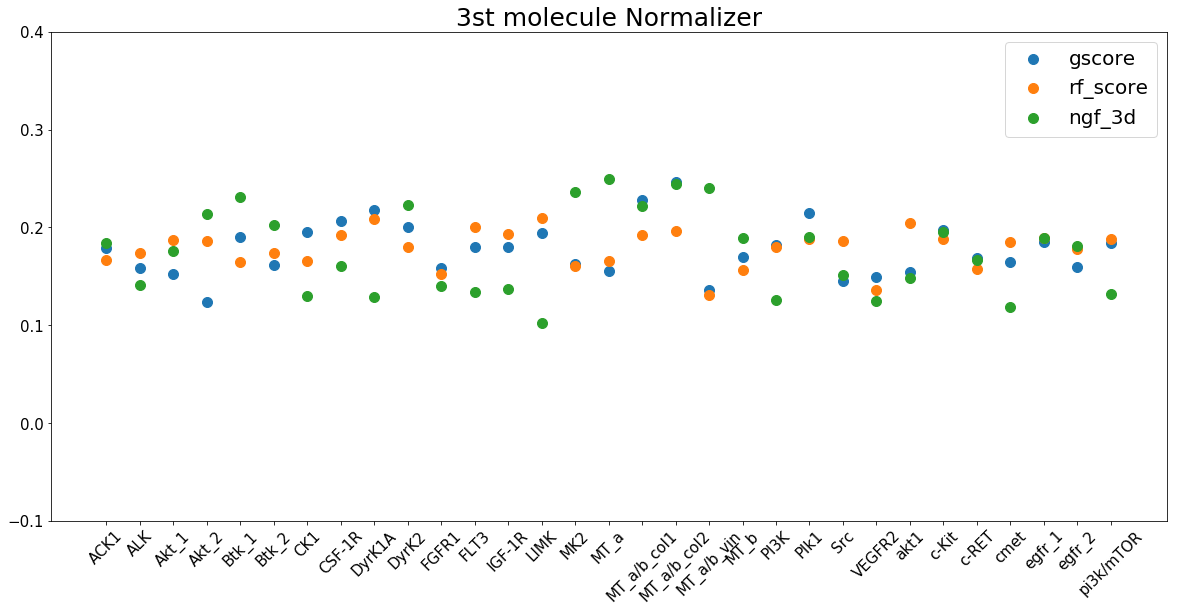

In [276]:
g_new3 = Normalizer(norm='l2').fit_transform(-gscore3.values.reshape(1, -1))
rf_new3 = Normalizer(norm='l2').fit_transform(rf3.values.reshape(1, -1))
ngf_new3 = Normalizer(norm='l2').fit_transform(ngf3.values.reshape(1, -1))

plt.figure(figsize=(20, 9))
plt.scatter(target, g_new2, s=100, label='gscore')
plt.scatter(target, rf_new2, s=100, label='rf_score')
plt.scatter(target, ngf_new2, s=100, label='ngf_3d')
import pylab as pl
pl.xticks(rotation=45)
plt.legend(fontsize=20)
plt.title('3st molecule Normalizer', {'fontsize': 25})
plt.ylim(-0.1, 0.4)
plt.tick_params(labelsize=15)
plt.show()

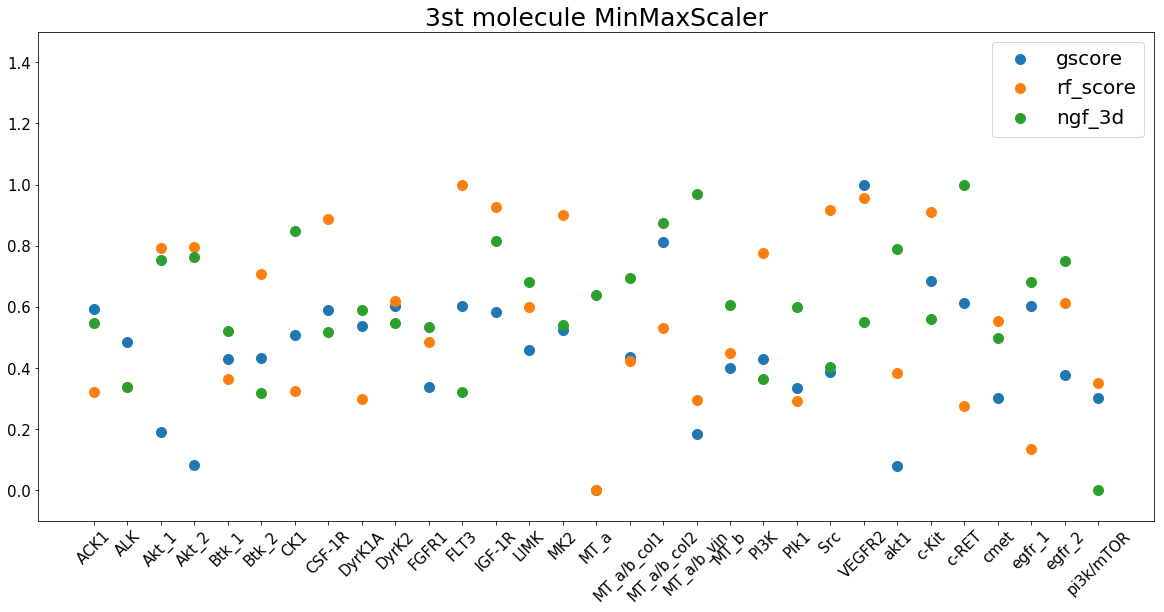

In [277]:
g_newww = MinMaxScaler().fit_transform(-gscore3.values.reshape(-1, 1))
rf_newww = MinMaxScaler().fit_transform(rf3.values.reshape(-1, 1))
ngf_newww = MinMaxScaler().fit_transform(ngf3.values.reshape(-1, 1))

plt.figure(figsize=(20, 9))
plt.ylim(-0.1, 1.3)
plt.scatter(target.values, g_newww.ravel(), s=100, label='gscore')
plt.scatter(target, rf_newww.ravel(), s=100, label='rf_score')
plt.scatter(target, ngf_newww.ravel(), s=100, label='ngf_3d')
import pylab as pl
pl.xticks(rotation=45)
plt.legend(fontsize=20)
plt.ylim(-0.1, 1.5)
plt.title('3st molecule MinMaxScaler', {'fontsize': 25})
plt.tick_params(labelsize=15)
plt.show()

In [301]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [307]:
# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="class", y="survived", hue="sex", data=titanic,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

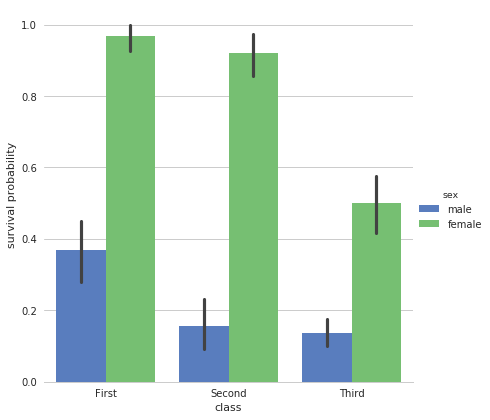

In [299]:
plt.show()